### 히스토그램

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
mydata = pd.read_csv('./data/mydata.csv', encoding='utf-8')
mydata

,TM,CA_TOT,HM_AVG,RN_DAY
0,20150101,3.4,51.1,0.1
1,20150102,3.1,53.6,0.0
2,20150103,3.7,59.6,-9.0
3,20150104,3.1,68.8,-9.0
4,20150105,6.5,79.4,2.0
...,...,...,...,...
360,20151227,0.0,40.6,-9.0
361,20151228,2.1,36.5,-9.0
362,20151229,3.0,47.3,-9.0
363,20151230,4.3,61.0,0.6


In [45]:
mydata.isnull().sum()

TM        0
CA_TOT    0
HM_AVG    0
RN_DAY    0
dtype: int64

array([[<AxesSubplot:title={'center':'HM_AVG'}>]], dtype=object)

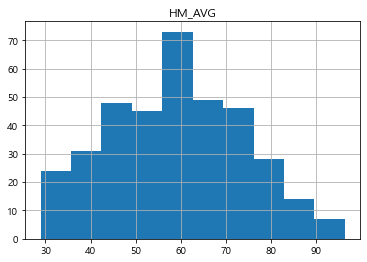

In [20]:
# 히스토그램 평균습도의 범위 
mydata[['HM_AVG']].hist(bins=10)

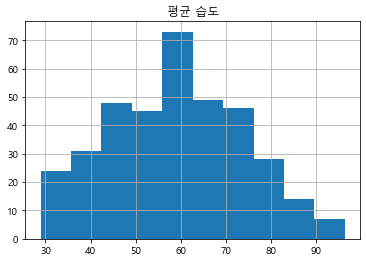

In [21]:
plt.hist(mydata['HM_AVG'], bins=10)
plt.title('평균 습도')
plt.grid(True)
plt.show()

c:\DEV\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HM_AVG', ylabel='Density'>

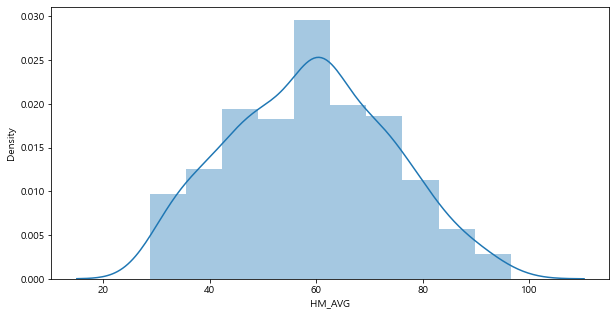

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(mydata.HM_AVG, bins=10, kde=True)

In [23]:
df = pd.DataFrame(mydata)
df.describe()

,TM,CA_TOT,HM_AVG,RN_DAY
count,3.650000e+02,365.000000,365.000000,365.000000
mean,2.015067e+07,5.098356,59.019178,-3.671507
std,3.454755e+02,3.066515,14.973743,8.922004
min,2.015010e+07,0.000000,28.900000,-9.000000
25%,2.015040e+07,2.600000,48.000000,-9.000000
50%,2.015070e+07,5.000000,59.400000,-9.000000
75%,2.015100e+07,7.800000,70.000000,0.500000
max,2.015123e+07,10.000000,96.500000,45.500000


In [24]:
import scipy as sp

sp.stats.describe(mydata)

DescribeResult(nobs=365, minmax=(array([ 2.0150101e+07,  0.0000000e+00,  2.8900000e+01, -9.0000000e+00]), array([2.0151231e+07, 1.0000000e+01, 9.6500000e+01, 4.5500000e+01])), mean=array([ 2.01506683e+07,  5.09835616e+00,  5.90191781e+01, -3.67150685e+00]), variance=array([1.19353296e+05, 9.40351377e+00, 2.24212983e+02, 7.96021529e+01]), skewness=array([-0.01069441, -0.04127374,  0.08465603,  2.34500701]), kurtosis=array([-1.20571404, -1.16737904, -0.60915828,  7.10336469]))

### BoxPlot

<AxesSubplot:>

c:\DEV\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


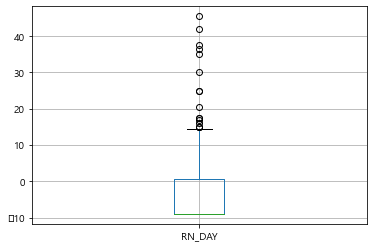

In [25]:
mydata.boxplot(column='RN_DAY')

<AxesSubplot:>

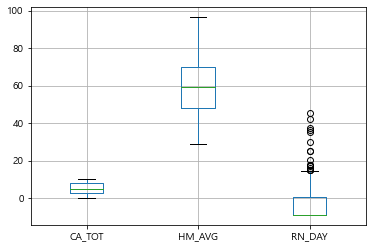

In [26]:
mydata.boxplot(column=['CA_TOT', 'HM_AVG', 'RN_DAY'])

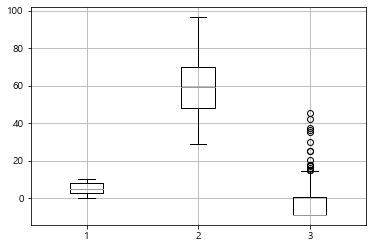

In [27]:
fig, ax = plt.subplots()
ax.boxplot(mydata[['CA_TOT', 'HM_AVG', 'RN_DAY']])

plt.grid(True)
plt.show()

In [33]:
mydata_corr = mydata.iloc[:, 1:4]
print(mydata_corr)
mydata_corr.corr(method='pearson')

     CA_TOT  HM_AVG  RN_DAY
0       3.4    51.1     0.1
1       3.1    53.6     0.0
2       3.7    59.6    -9.0
3       3.1    68.8    -9.0
4       6.5    79.4     2.0
..      ...     ...     ...
360     0.0    40.6    -9.0
361     2.1    36.5    -9.0
362     3.0    47.3    -9.0
363     4.3    61.0     0.6
364     4.0    72.3    -9.0

[365 rows x 3 columns]


,CA_TOT,HM_AVG,RN_DAY
CA_TOT,1.000000,0.665570,0.561871
HM_AVG,0.665570,1.000000,0.591783
RN_DAY,0.561871,0.591783,1.000000


In [69]:
import numpy as np
# 음수 마이너스표시가 깨질때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

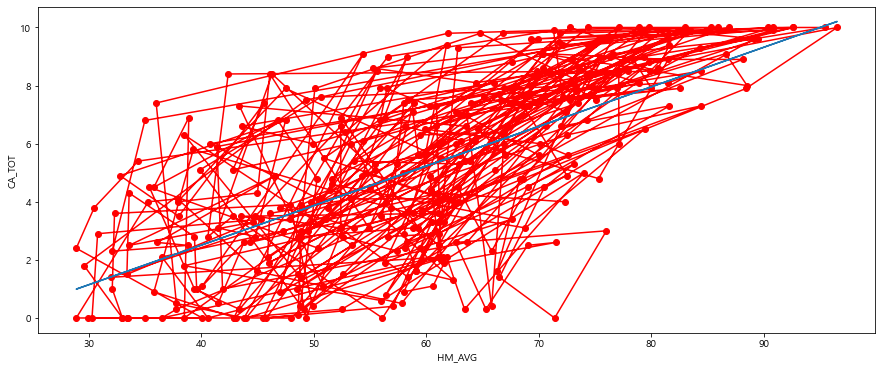

In [74]:
plt.figure(figsize=(15,6))
x = mydata_corr.HM_AVG.to_numpy()
y = mydata_corr.CA_TOT.to_numpy()
plt.plot(x, y, color='r', marker='o')
plt.xlabel('HM_AVG')
plt.ylabel('CA_TOT')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()

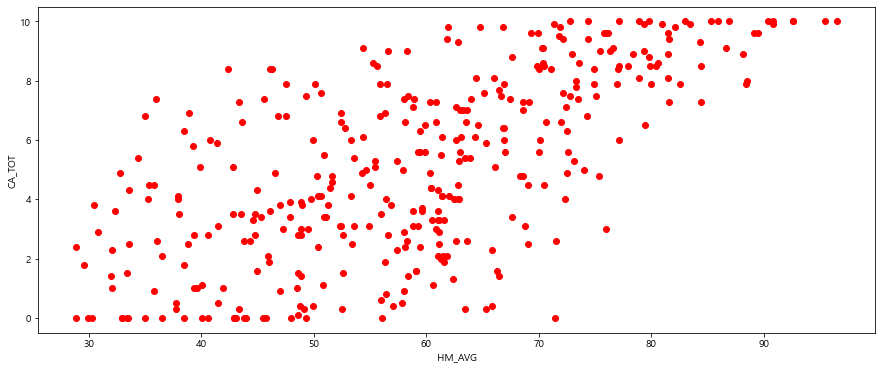

In [42]:
plt.figure(figsize=(15,6))
plt.scatter(x=mydata_corr.HM_AVG, y=mydata_corr.CA_TOT, color='r', marker='o')
plt.xlabel('HM_AVG')
plt.ylabel('CA_TOT')
plt.show()

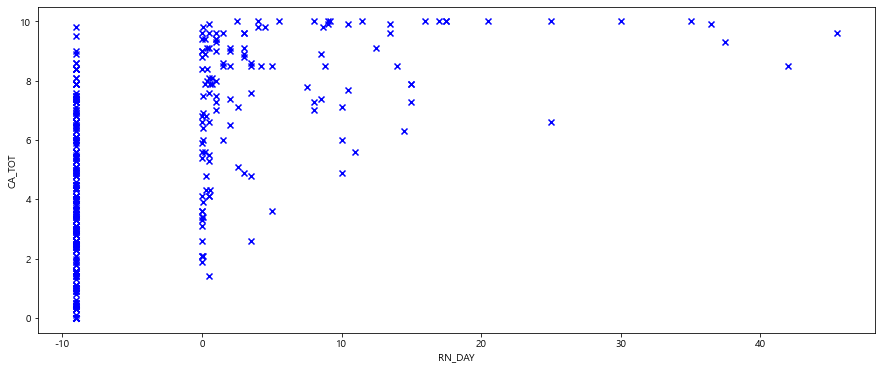

In [43]:
plt.figure(figsize=(15,6))
plt.scatter(x=mydata_corr.RN_DAY, y=mydata_corr.CA_TOT, color='b', marker='x')
plt.xlabel('RN_DAY')
plt.ylabel('CA_TOT')
plt.show()

#### 간단한 차트보기

<AxesSubplot:>

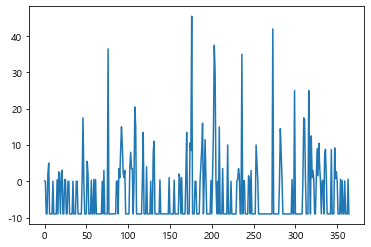

In [46]:
mydata.RN_DAY.plot.line()

<AxesSubplot:>

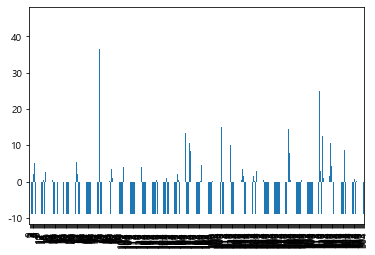

In [47]:
mydata.RN_DAY.plot.bar()

In [51]:
dr = pd.read_csv('./data/data_regression.csv', encoding='utf-8')
dr

,TM,CA_TOT,SS_DAY
0,20150101,3.4,7.8
1,20150102,3.1,7.1
2,20150103,3.7,5.8
3,20150104,3.1,6.2
4,20150105,6.5,5.1
...,...,...,...
360,20151227,0.0,8.8
361,20151228,2.1,7.9
362,20151229,3.0,7.7
363,20151230,4.3,7.6


In [65]:
dr_df = pd.DataFrame(dr)
dr_df

,TM,CA_TOT,SS_DAY
0,20150101,3.4,7.8
1,20150102,3.1,7.1
2,20150103,3.7,5.8
3,20150104,3.1,6.2
4,20150105,6.5,5.1
...,...,...,...
360,20151227,0.0,8.8
361,20151228,2.1,7.9
362,20151229,3.0,7.7
363,20151230,4.3,7.6
